In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)
np.random.seed(42)

#### 1. Wczytanie i przypomnienie danych 

In [48]:
# data, target
data = np.load('data.npy')
target = np.load('target.npy')

print (f'{data[:5,:]}\n')
print (target[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [51]:
target_map = {n:target_names[n] for n in range(len(target_names))}
target_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [49]:
# columns names

names = np.load('names.npy')
feature_names = names.tolist()[0:2] + [names.tolist()[-1]]


target_names = np.load('target_names.npy')

print (feature_names)
print (target_names)

['sepal length (cm)', 'sepal width (cm)', 'class']
['setosa' 'versicolor' 'virginica']


In [54]:
df = pd.DataFrame(data = np.c_[data, target], columns=feature_names)

df['class_name'] = df['class'].map(target_map)
df.head()

,sepal length (cm),sepal width (cm),class,class_name
0,5.1,3.5,0.0,setosa
1,4.9,3.0,0.0,setosa
2,4.7,3.2,0.0,setosa
3,4.6,3.1,0.0,setosa
4,5.0,3.6,0.0,setosa


In [58]:
px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='class_name', width=800)

In [59]:
df.groupby('class_name').agg('mean')

,sepal length (cm),sepal width (cm),class
class_name,,,
setosa,5.006,3.428,0.0
versicolor,5.936,2.770,1.0
virginica,6.588,2.974,2.0


#### 2. Model

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
# domyślnie '5' sąsiadów
classifier = KNeighborsClassifier()

In [73]:
classifier.fit(data,target)

KNeighborsClassifier()

#### 3. Wykres granic decyzyjnych

In [116]:
 # wyznaczenie minimum i maximum zmiennych x (dodanie marginesu 0.5)

x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

In [117]:
# np.meshgrid - tworzenie koordynatów
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [118]:
xx

array([[3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ],
       [3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ],
       [3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ],
       ...,
       [3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ],
       [3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ],
       [3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ]])

In [119]:
yy

array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
       [1.51, 1.51, 1.51, ..., 1.51, 1.51, 1.51],
       [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
       ...,
       [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
       [4.89, 4.89, 4.89, ..., 4.89, 4.89, 4.89],
       [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]])

In [120]:
## ravel powoduje wypłaszczenie tablicy do 1d
xx.ravel() 

array([3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ])

In [121]:
# łącznie koordynatów - tworzenie siatki:

mesh = np.c_[xx.ravel(), yy.ravel()]

In [122]:
mesh

array([[3.8 , 1.5 ],
       [3.81, 1.5 ],
       [3.82, 1.5 ],
       ...,
       [8.38, 4.9 ],
       [8.39, 4.9 ],
       [8.4 , 4.9 ]])

In [123]:
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

### - wykres

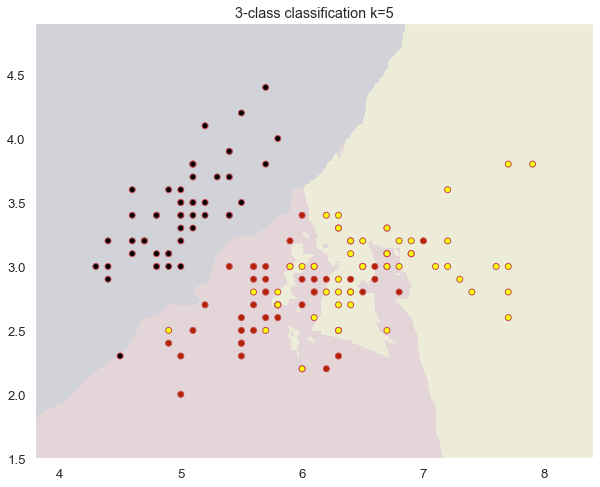

In [131]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1,  shading='auto')
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show();

### 4. Funkcja modelu i wyznaczania siatki 

In [138]:
 def plot_decision_boundries(n_neighbors=1):
     
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(data, target)

    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1, shading='auto')
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={n_neighbors}')
    plt.show()


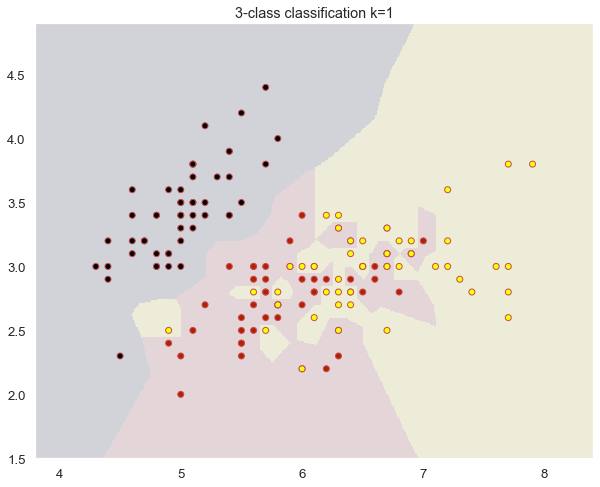

In [139]:
plot_decision_boundries(1)

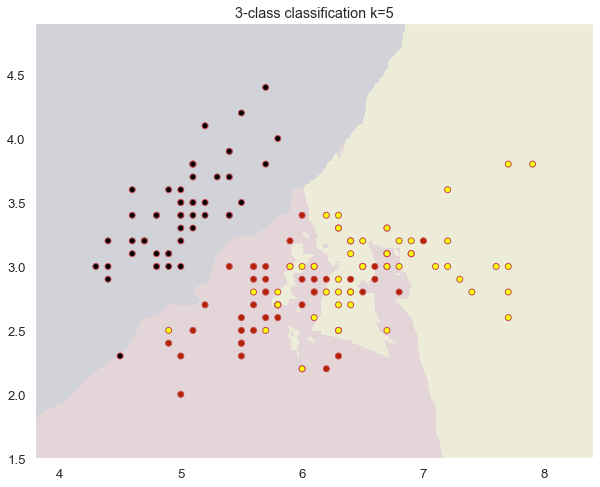

In [147]:
plot_decision_boundries(5)

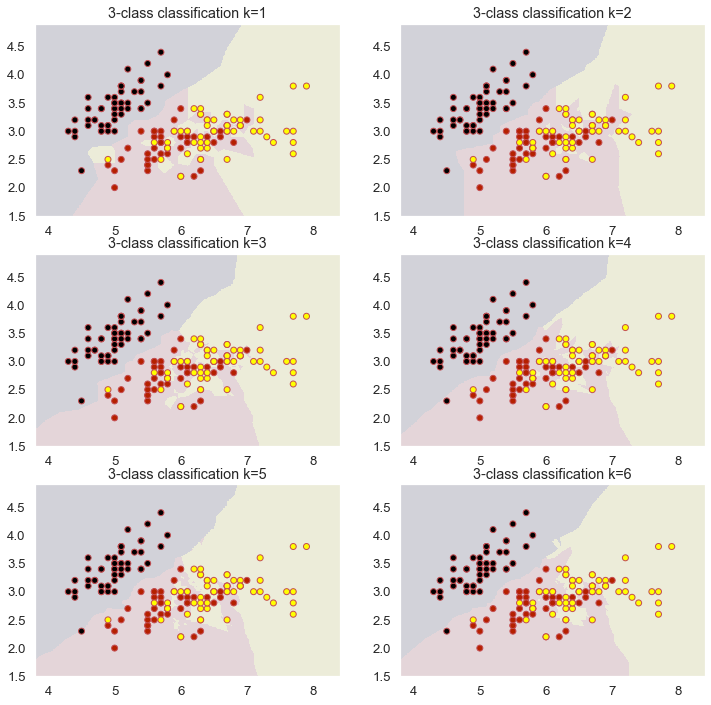

In [145]:
plt.figure(figsize=(12, 12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(data, target)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1, shading='auto')
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}')

plt.show()